# 103 - Underfit, overfit ve validation set

Bu kez ağımızın karmaşıklığını arttırmanın ve azaltmanın ağın performansı üzerindeki etkilerini inceleyek ve doğrulama kümesi'nin (*validation set*) niçin gerekli olduğunu ögreneceğiz.


In [1]:
%matplotlib inline
from keras.layers import Dense
from keras.models import Sequential
import random
import matplotlib.pyplot as plt
import math
import numpy as np

np.random.seed(1337)

Using TensorFlow backend.


## Training ve test kümelerinin oluşturulması

Training ve test kümelerini üreten fonksiyonlarımızda çok fazla değişiklik yok. Geçen derste eklediğimiz bias ve scale değerlerini kaldırdım.

testModel fonksiyonunu ise ideal sinus fonksiyonu yerine training verisini çizecek şekilde güncelledim.

In [2]:
def sine_function(noiserate=0):
    def _sine_function(angle):
        return (math.sin(angle)+random.uniform(-noiserate,noiserate))
    return _sine_function

def trainingData(func):
    noiserate = 0.2
    X = []
    y = []
    for i in range(0,100):
        angle=random.uniform(-math.pi,math.pi)
        X.append(angle)
        y.append(func(angle))
    return X,y

def testData(func):
    X = []
    y = []
    for i in range(-1800,1800):
        angle = math.radians(i/10)
        X.append(angle)
        y.append(func(angle))
    return X,y

def testModel(Xtrain,ytrain,X,y):
    res = model.predict(X, batch_size=32)

    plt.scatter(Xtrain,ytrain,s=0.5,label='Training',color='blue')
    plt.plot(X,res, label='sonuc',color='red')
    plt.xlabel('x (Radyan)')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.show()

## Validation set 

Şu anda tek boyutlu girişimiz ve tek boyutlu çıkışımız olduğundan rahatlıkla grafik çizerek ağımızın ne kadar genelleştirme yaptığını doğrulayabiliyoruz. Ancak bir çok *machine learning* problemi çok yüksek sayıda boyuta sahiptir ve o kadar da kolay görselleştirilemez. Bu yüzden *training set*'in bir kısmını ayırıp eğitim için hiç kullanmayız. Böylece ağın hiç görmediği örnekler için de iyi çalışıp çalışmadığını sayısal olarak ölçebileceğimiz bir aracımız olur.

## Deney 1 - Underfit

Modelin veriyi modellemeye yetecek kadar parametresi olmaması *underfit* denilen olaya, yani bir çeşit aşırı genelleştirmeye yol açar. Bunu test etmek için gizli katmanımızdaki nöron sayısını 1'e indirelim.

```python 
model.fit(X, y, epochs=5000,validation_split=0.1)
```
Buradaki validation_split=0.1 parametresiyle de training set'in 10'da birinin validation set olarak ayrılacağını söylüyoruz. Her epoch'tan sonra keras bize normal loss'un dışında artık validation loss'u da bildirecek.

Train on 90 samples, validate on 10 samples
Epoch 1/1000
90/90 [==============================] - 0s - loss: 8.9406 - val_loss: 2.9118
Epoch 2/1000
90/90 [==============================] - 0s - loss: 2.9006 - val_loss: 1.3733
Epoch 3/1000
90/90 [==============================] - 0s - loss: 1.4940 - val_loss: 0.8587
Epoch 4/1000
90/90 [==============================] - 0s - loss: 0.9532 - val_loss: 0.6527
Epoch 5/1000
90/90 [==============================] - 0s - loss: 0.6989 - val_loss: 0.5542
Epoch 6/1000
90/90 [==============================] - 0s - loss: 0.5636 - val_loss: 0.5043
Epoch 7/1000
90/90 [==============================] - 0s - loss: 0.4718 - val_loss: 0.4816
Epoch 8/1000
90/90 [==============================] - 0s - loss: 0.4240 - val_loss: 0.4717
Epoch 9/1000
90/90 [==============================] - 0s - loss: 0.3914 - val_loss: 0.4689
Epoch 10/1000
90/90 [==============================] - 0s - loss: 0.3700 - val_loss: 0.4695
Epoch 11/1000
90/90 [========================

90/90 [==============================] - 0s - loss: 0.2631 - val_loss: 0.4266
Epoch 90/1000
90/90 [==============================] - 0s - loss: 0.2614 - val_loss: 0.4256
Epoch 91/1000
90/90 [==============================] - 0s - loss: 0.2608 - val_loss: 0.4245
Epoch 92/1000
90/90 [==============================] - 0s - loss: 0.2604 - val_loss: 0.4242
Epoch 93/1000
90/90 [==============================] - 0s - loss: 0.2595 - val_loss: 0.4236
Epoch 94/1000
90/90 [==============================] - 0s - loss: 0.2590 - val_loss: 0.4231
Epoch 95/1000
90/90 [==============================] - 0s - loss: 0.2582 - val_loss: 0.4217
Epoch 96/1000
90/90 [==============================] - 0s - loss: 0.2578 - val_loss: 0.4200
Epoch 97/1000
90/90 [==============================] - 0s - loss: 0.2574 - val_loss: 0.4185
Epoch 98/1000
90/90 [==============================] - 0s - loss: 0.2562 - val_loss: 0.4181
Epoch 99/1000
90/90 [==============================] - 0s - loss: 0.2558 - val_loss: 0.4176
Ep

Epoch 177/1000
90/90 [==============================] - 0s - loss: 0.2088 - val_loss: 0.3518
Epoch 178/1000
90/90 [==============================] - 0s - loss: 0.2092 - val_loss: 0.3509
Epoch 179/1000
90/90 [==============================] - 0s - loss: 0.2082 - val_loss: 0.3501
Epoch 180/1000
90/90 [==============================] - 0s - loss: 0.2075 - val_loss: 0.3497
Epoch 181/1000
90/90 [==============================] - 0s - loss: 0.2070 - val_loss: 0.3486
Epoch 182/1000
90/90 [==============================] - 0s - loss: 0.2068 - val_loss: 0.3474
Epoch 183/1000
90/90 [==============================] - 0s - loss: 0.2060 - val_loss: 0.3467
Epoch 184/1000
90/90 [==============================] - 0s - loss: 0.2057 - val_loss: 0.3466
Epoch 185/1000
90/90 [==============================] - 0s - loss: 0.2059 - val_loss: 0.3453
Epoch 186/1000
90/90 [==============================] - 0s - loss: 0.2052 - val_loss: 0.3441
Epoch 187/1000
90/90 [==============================] - 0s - loss: 0.2

90/90 [==============================] - 0s - loss: 0.1861 - val_loss: 0.3025
Epoch 265/1000
90/90 [==============================] - 0s - loss: 0.1852 - val_loss: 0.3014
Epoch 266/1000
90/90 [==============================] - 0s - loss: 0.1854 - val_loss: 0.3015
Epoch 267/1000
90/90 [==============================] - 0s - loss: 0.1847 - val_loss: 0.3013
Epoch 268/1000
90/90 [==============================] - 0s - loss: 0.1844 - val_loss: 0.3006
Epoch 269/1000
90/90 [==============================] - ETA: 0s - loss: 0.193 - 0s - loss: 0.1843 - val_loss: 0.3002
Epoch 270/1000
90/90 [==============================] - 0s - loss: 0.1842 - val_loss: 0.3000
Epoch 271/1000
90/90 [==============================] - 0s - loss: 0.1844 - val_loss: 0.2999
Epoch 272/1000
90/90 [==============================] - 0s - loss: 0.1843 - val_loss: 0.2990
Epoch 273/1000
90/90 [==============================] - 0s - loss: 0.1845 - val_loss: 0.2995
Epoch 274/1000
90/90 [==============================] - 0s - 

90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2886
Epoch 352/1000
90/90 [==============================] - 0s - loss: 0.1830 - val_loss: 0.2893
Epoch 353/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2884
Epoch 354/1000
90/90 [==============================] - 0s - loss: 0.1831 - val_loss: 0.2873
Epoch 355/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2872
Epoch 356/1000
90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2880
Epoch 357/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2884
Epoch 358/1000
90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2885
Epoch 359/1000
90/90 [==============================] - 0s - loss: 0.1827 - val_loss: 0.2887
Epoch 360/1000
90/90 [==============================] - 0s - loss: 0.1827 - val_loss: 0.2891
Epoch 361/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss:

90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2872
Epoch 440/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2872
Epoch 441/1000
90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2864
Epoch 442/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2860
Epoch 443/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2860
Epoch 444/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2867
Epoch 445/1000
90/90 [==============================] - 0s - loss: 0.1828 - val_loss: 0.2860
Epoch 446/1000
90/90 [==============================] - 0s - loss: 0.1833 - val_loss: 0.2849
Epoch 447/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2851
Epoch 448/1000
90/90 [==============================] - 0s - loss: 0.1827 - val_loss: 0.2853
Epoch 449/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss:

90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2847
Epoch 527/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2839
Epoch 528/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2840
Epoch 529/1000
90/90 [==============================] - 0s - loss: 0.1829 - val_loss: 0.2838
Epoch 530/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2841
Epoch 531/1000
90/90 [==============================] - 0s - loss: 0.1827 - val_loss: 0.2838
Epoch 532/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2840
Epoch 533/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2843
Epoch 534/1000
90/90 [==============================] - 0s - loss: 0.1829 - val_loss: 0.2852
Epoch 535/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2850
Epoch 536/1000
90/90 [==============================] - 0s - loss: 0.1822 - val_loss:

90/90 [==============================] - 0s - loss: 0.1822 - val_loss: 0.2844
Epoch 614/1000
90/90 [==============================] - 0s - loss: 0.1831 - val_loss: 0.2850
Epoch 615/1000
90/90 [==============================] - 0s - loss: 0.1829 - val_loss: 0.2858
Epoch 616/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2860
Epoch 617/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2856
Epoch 618/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss: 0.2847
Epoch 619/1000
90/90 [==============================] - 0s - loss: 0.1829 - val_loss: 0.2859
Epoch 620/1000
90/90 [==============================] - 0s - loss: 0.1822 - val_loss: 0.2861
Epoch 621/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss: 0.2863
Epoch 622/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2859
Epoch 623/1000
90/90 [==============================] - 0s - loss: 0.1828 - val_loss:

90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2853
Epoch 701/1000
90/90 [==============================] - 0s - loss: 0.1828 - val_loss: 0.2858
Epoch 702/1000
90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2863
Epoch 703/1000
90/90 [==============================] - 0s - loss: 0.1838 - val_loss: 0.2859
Epoch 704/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2856
Epoch 705/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss: 0.2848
Epoch 706/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2843
Epoch 707/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2844
Epoch 708/1000
90/90 [==============================] - 0s - loss: 0.1828 - val_loss: 0.2856
Epoch 709/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss: 0.2848
Epoch 710/1000
90/90 [==============================] - 0s - loss: 0.1822 - val_loss:

90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2839
Epoch 787/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2841
Epoch 788/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2841
Epoch 789/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss: 0.2843
Epoch 790/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2844
Epoch 791/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2854
Epoch 792/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2848
Epoch 793/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2858
Epoch 794/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2857
Epoch 795/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2855
Epoch 796/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss:

90/90 [==============================] - 0s - loss: 0.1822 - val_loss: 0.2870
Epoch 874/1000
90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2860
Epoch 875/1000
90/90 [==============================] - 0s - loss: 0.1830 - val_loss: 0.2866
Epoch 876/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2862
Epoch 877/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2857
Epoch 878/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2863
Epoch 879/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2855
Epoch 880/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2850
Epoch 881/1000
90/90 [==============================] - 0s - loss: 0.1823 - val_loss: 0.2857
Epoch 882/1000
90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2847
Epoch 883/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss:

90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2851
Epoch 962/1000
90/90 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2855
Epoch 963/1000
90/90 [==============================] - 0s - loss: 0.1827 - val_loss: 0.2844
Epoch 964/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2847
Epoch 965/1000
90/90 [==============================] - 0s - loss: 0.1826 - val_loss: 0.2848
Epoch 966/1000
90/90 [==============================] - 0s - loss: 0.1829 - val_loss: 0.2845
Epoch 967/1000
90/90 [==============================] - 0s - loss: 0.1822 - val_loss: 0.2850
Epoch 968/1000
90/90 [==============================] - 0s - loss: 0.1822 - val_loss: 0.2851
Epoch 969/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2852
Epoch 970/1000
90/90 [==============================] - 0s - loss: 0.1821 - val_loss: 0.2852
Epoch 971/1000
90/90 [==============================] - 0s - loss: 0.1824 - val_loss:

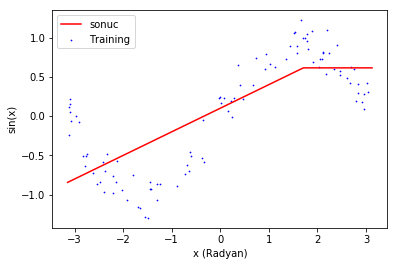

In [3]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='sgd')
sine = sine_function(noiserate=0.3)
X,y = trainingData(sine)
X_test, y_test = testData(sine)
model.fit(X, y, epochs=1000,validation_split=0.1)
testModel(X,y,X_test,y_test)


Model bu kadar az parametreyle ancak tek bir dirseği olan iki çizgi modelleyebildiğinden veriye bu kadar yaklaşabildi. 

Eğitimin sonunda training loss'un da validation loss'un da oldukça yüksek bir değerde düşmeyi bıraktığını görüyoruz. Bu ağınızın underfit durumunda olduğuna işaret eder. Ağın performansı hem gördüğü, hem de daha önceki görmediği örnekler için kötü durumda.

## Deney 2 - Overfit

Skalanın tam karşı noktasında ise *overfit* var. Modelimizin karmaşıklığı gerekenden fazlaysa bu kez de model genelleme yapma yetisini kaybeder. Bunu test etmek için elimizde problemle orantısız büyüklükte bir ağ tanımlayalım. Bu ağ 280, 180, 80 ve 80 nörana sahip 4 ayrı gizli katman (*hidden layer*) içeriyor. 

Train on 90 samples, validate on 10 samples
Epoch 1/1000
90/90 [==============================] - 0s - loss: 0.3531 - val_loss: 0.2585
Epoch 2/1000
90/90 [==============================] - 0s - loss: 0.2181 - val_loss: 0.1432
Epoch 3/1000
90/90 [==============================] - 0s - loss: 0.1945 - val_loss: 0.0937
Epoch 4/1000
90/90 [==============================] - 0s - loss: 0.2074 - val_loss: 0.0931
Epoch 5/1000
90/90 [==============================] - 0s - loss: 0.1883 - val_loss: 0.1107
Epoch 6/1000
90/90 [==============================] - 0s - loss: 0.1780 - val_loss: 0.1388
Epoch 7/1000
90/90 [==============================] - 0s - loss: 0.1750 - val_loss: 0.1385
Epoch 8/1000
90/90 [==============================] - 0s - loss: 0.1672 - val_loss: 0.1132
Epoch 9/1000
90/90 [==============================] - 0s - loss: 0.1568 - val_loss: 0.0925
Epoch 10/1000
90/90 [==============================] - 0s - loss: 0.1516 - val_loss: 0.0820
Epoch 11/1000
90/90 [========================

90/90 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0168
Epoch 90/1000
90/90 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0172
Epoch 91/1000
90/90 [==============================] - 0s - loss: 0.0122 - val_loss: 0.0240
Epoch 92/1000
90/90 [==============================] - 0s - loss: 0.0107 - val_loss: 0.0174
Epoch 93/1000
90/90 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0169
Epoch 94/1000
90/90 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0192
Epoch 95/1000
90/90 [==============================] - 0s - loss: 0.0109 - val_loss: 0.0177
Epoch 96/1000
90/90 [==============================] - 0s - loss: 0.0104 - val_loss: 0.0188
Epoch 97/1000
90/90 [==============================] - 0s - loss: 0.0104 - val_loss: 0.0217
Epoch 98/1000
90/90 [==============================] - 0s - loss: 0.0111 - val_loss: 0.0186
Epoch 99/1000
90/90 [==============================] - 0s - loss: 0.0129 - val_loss: 0.0159
Ep

90/90 [==============================] - 0s - loss: 0.0103 - val_loss: 0.0193
Epoch 178/1000
90/90 [==============================] - 0s - loss: 0.0107 - val_loss: 0.0188
Epoch 179/1000
90/90 [==============================] - 0s - loss: 0.0105 - val_loss: 0.0180
Epoch 180/1000
90/90 [==============================] - 0s - loss: 0.0105 - val_loss: 0.0214
Epoch 181/1000
90/90 [==============================] - 0s - loss: 0.0106 - val_loss: 0.0181
Epoch 182/1000
90/90 [==============================] - 0s - loss: 0.0098 - val_loss: 0.0210
Epoch 183/1000
90/90 [==============================] - 0s - loss: 0.0105 - val_loss: 0.0194
Epoch 184/1000
90/90 [==============================] - 0s - loss: 0.0099 - val_loss: 0.0216
Epoch 185/1000
90/90 [==============================] - 0s - loss: 0.0101 - val_loss: 0.0188
Epoch 186/1000
90/90 [==============================] - 0s - loss: 0.0099 - val_loss: 0.0216
Epoch 187/1000
90/90 [==============================] - 0s - loss: 0.0100 - val_loss:

90/90 [==============================] - 0s - loss: 0.0116 - val_loss: 0.0198
Epoch 266/1000
90/90 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0198
Epoch 267/1000
90/90 [==============================] - 0s - loss: 0.0118 - val_loss: 0.0222
Epoch 268/1000
90/90 [==============================] - 0s - loss: 0.0119 - val_loss: 0.0162
Epoch 269/1000
90/90 [==============================] - 0s - loss: 0.0130 - val_loss: 0.0249
Epoch 270/1000
90/90 [==============================] - 0s - loss: 0.0123 - val_loss: 0.0231
Epoch 271/1000
90/90 [==============================] - 0s - loss: 0.0107 - val_loss: 0.0134
Epoch 272/1000
90/90 [==============================] - 0s - loss: 0.0123 - val_loss: 0.0249
Epoch 273/1000
90/90 [==============================] - 0s - loss: 0.0137 - val_loss: 0.0233
Epoch 274/1000
90/90 [==============================] - 0s - loss: 0.0109 - val_loss: 0.0166
Epoch 275/1000
90/90 [==============================] - 0s - loss: 0.0126 - val_loss:

90/90 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0188
Epoch 352/1000
90/90 [==============================] - 0s - loss: 0.0107 - val_loss: 0.0196
Epoch 353/1000
90/90 [==============================] - 0s - loss: 0.0133 - val_loss: 0.0271
Epoch 354/1000
90/90 [==============================] - 0s - loss: 0.0106 - val_loss: 0.0173
Epoch 355/1000
90/90 [==============================] - 0s - loss: 0.0106 - val_loss: 0.0189
Epoch 356/1000
90/90 [==============================] - 0s - loss: 0.0117 - val_loss: 0.0245
Epoch 357/1000
90/90 [==============================] - 0s - loss: 0.0113 - val_loss: 0.0176
Epoch 358/1000
90/90 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0200
Epoch 359/1000
90/90 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0267
Epoch 360/1000
90/90 [==============================] - 0s - loss: 0.0098 - val_loss: 0.0214
Epoch 361/1000
90/90 [==============================] - 0s - loss: 0.0109 - val_loss:

90/90 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0198
Epoch 439/1000
90/90 [==============================] - 0s - loss: 0.0101 - val_loss: 0.0167
Epoch 440/1000
90/90 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0208
Epoch 441/1000
90/90 [==============================] - ETA: 0s - loss: 0.005 - 0s - loss: 0.0101 - val_loss: 0.0236
Epoch 442/1000
90/90 [==============================] - 0s - loss: 0.0099 - val_loss: 0.0174
Epoch 443/1000
90/90 [==============================] - 0s - loss: 0.0096 - val_loss: 0.0220
Epoch 444/1000
90/90 [==============================] - 0s - loss: 0.0100 - val_loss: 0.0220
Epoch 445/1000
90/90 [==============================] - 0s - loss: 0.0089 - val_loss: 0.0202
Epoch 446/1000
90/90 [==============================] - 0s - loss: 0.0102 - val_loss: 0.0228
Epoch 447/1000
90/90 [==============================] - 0s - loss: 0.0098 - val_loss: 0.0197
Epoch 448/1000
90/90 [==============================] - 0s - 

90/90 [==============================] - 0s - loss: 0.0096 - val_loss: 0.0223
Epoch 526/1000
90/90 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0170
Epoch 527/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0200
Epoch 528/1000
90/90 [==============================] - 0s - loss: 0.0085 - val_loss: 0.0247
Epoch 529/1000
90/90 [==============================] - 0s - loss: 0.0099 - val_loss: 0.0195
Epoch 530/1000
90/90 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0233
Epoch 531/1000
90/90 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0204
Epoch 532/1000
90/90 [==============================] - 0s - loss: 0.0097 - val_loss: 0.0207
Epoch 533/1000
90/90 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0214
Epoch 534/1000
90/90 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0194
Epoch 535/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss:

90/90 [==============================] - 0s - loss: 0.0104 - val_loss: 0.0254
Epoch 614/1000
90/90 [==============================] - 0s - loss: 0.0103 - val_loss: 0.0180
Epoch 615/1000
90/90 [==============================] - 0s - loss: 0.0095 - val_loss: 0.0238
Epoch 616/1000
90/90 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0255
Epoch 617/1000
90/90 [==============================] - 0s - loss: 0.0087 - val_loss: 0.0218
Epoch 618/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0213
Epoch 619/1000
90/90 [==============================] - 0s - loss: 0.0097 - val_loss: 0.0197
Epoch 620/1000
90/90 [==============================] - 0s - loss: 0.0099 - val_loss: 0.0205
Epoch 621/1000
90/90 [==============================] - 0s - loss: 0.0093 - val_loss: 0.0232
Epoch 622/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0252
Epoch 623/1000
90/90 [==============================] - 0s - loss: 0.0102 - val_loss:

90/90 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0218
Epoch 702/1000
90/90 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0206
Epoch 703/1000
90/90 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0219
Epoch 704/1000
90/90 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0223
Epoch 705/1000
90/90 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0240
Epoch 706/1000
90/90 [==============================] - 0s - loss: 0.0093 - val_loss: 0.0205
Epoch 707/1000
90/90 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0241
Epoch 708/1000
90/90 [==============================] - 0s - loss: 0.0083 - val_loss: 0.0262
Epoch 709/1000
90/90 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0237
Epoch 710/1000
90/90 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0231
Epoch 711/1000
90/90 [==============================] - 0s - loss: 0.0085 - val_loss:

90/90 [==============================] - 0s - loss: 0.0103 - val_loss: 0.0272
Epoch 790/1000
90/90 [==============================] - 0s - loss: 0.0113 - val_loss: 0.0280
Epoch 791/1000
90/90 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0211
Epoch 792/1000
90/90 [==============================] - 0s - loss: 0.0110 - val_loss: 0.0242
Epoch 793/1000
90/90 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0248
Epoch 794/1000
90/90 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0215
Epoch 795/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0253
Epoch 796/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0223
Epoch 797/1000
90/90 [==============================] - 0s - loss: 0.0087 - val_loss: 0.0219
Epoch 798/1000
90/90 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0266
Epoch 799/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss:

90/90 [==============================] - 0s - loss: 0.0104 - val_loss: 0.0238
Epoch 878/1000
90/90 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0282
Epoch 879/1000
90/90 [==============================] - 0s - loss: 0.0096 - val_loss: 0.0235
Epoch 880/1000
90/90 [==============================] - 0s - loss: 0.0102 - val_loss: 0.0246
Epoch 881/1000
90/90 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0279
Epoch 882/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0206
Epoch 883/1000
90/90 [==============================] - 0s - loss: 0.0108 - val_loss: 0.0258
Epoch 884/1000
90/90 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0284
Epoch 885/1000
90/90 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0213
Epoch 886/1000
90/90 [==============================] - 0s - loss: 0.0085 - val_loss: 0.0231
Epoch 887/1000
90/90 [==============================] - 0s - loss: 0.0080 - val_loss:

90/90 [==============================] - 0s - loss: 0.0089 - val_loss: 0.0253
Epoch 966/1000
90/90 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0213
Epoch 967/1000
90/90 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0258
Epoch 968/1000
90/90 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0276
Epoch 969/1000
90/90 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0242
Epoch 970/1000
90/90 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0241
Epoch 971/1000
90/90 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0285
Epoch 972/1000
90/90 [==============================] - 0s - loss: 0.0087 - val_loss: 0.0255
Epoch 973/1000
90/90 [==============================] - 0s - loss: 0.0080 - val_loss: 0.0247
Epoch 974/1000
90/90 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0260
Epoch 975/1000
90/90 [==============================] - 0s - loss: 0.0084 - val_loss:

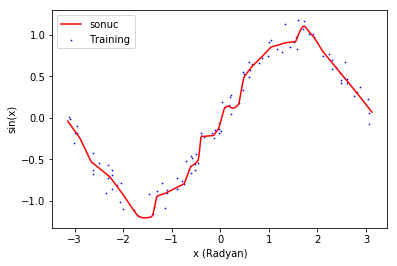

In [5]:
model = Sequential()
model.add(Dense(280, input_shape=(1,), activation='relu'))
model.add(Dense(180, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
sine = sine_function(noiserate=0.2)
X,y = trainingData(sine)
X_test, y_test = testData(sine)
model.fit(X, y, epochs=1000,validation_split=0.1)
testModel(X,y,X_test,y_test)

Modelimiz bu kez de elindeki çok miktarda parametreyi kullanarak, training set'teki her bir örneğe yaklaşabildiği kadar yaklaşmaya çalıştı. Modelin training loss'u çok küçük olsa da, daha önce görmediğı örneklerde ideal büyüklükte bir ağ'dan daha kötü performans sergiler.

Loss'ları inceleyince de, validation loss'un 100. epoch civarında düşmeyi bıraktığını, training loss'un ise bir süre daha düşmeye devam ettiğini görüyoruz. İşte tam da bu noktada ağımız overfit etmeye başlamış demek ki. İleride overfit olayını engellemek için çeşitli yöntemlerden bahsedeceğim.

## Özet

- Validation set olmadan ağın elimizdeki veriyi ne kadar iyi genelleştirdiğini anlamak imkansızdır. Training loss çok düşük olsa da, ağ bizim verdiğimiz örnekleri ezberlemiş (overfit) olabilir.
- Ağ'ın veriyi öğrenmek için yeterli karmaşıklığa sahip olmaması, yeterince ögrenememesine (underfit) yol açar. Bu durum hem training hem de validation loss'un yüksek olmasından anlaşılabilir. 
- Ağ'in veriyi ögrenmek için gerekenden fazla karmaşıklığa sahip olmasi, veriyi ezberlemesine (overfit) yol açar. Bu durum training loss düşerken, validation loss'un düşmeye devam etmemesi veya yükselmesiyle anlaşılabilir.

## Ödevler

- Veriyi öğrenmek için ideal olan modeli bulun.
- Training set'teki veri miktarını arttırmak, overfit durumunu nasıl etkiliyor?